In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path='/content/drive/MyDrive/Dataset/Train_Data.csv'
df=pd.read_csv(path)
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
# Select numeric columns (e.g., int64, float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Round numeric columns to whole numbers
df[numeric_columns] = df[numeric_columns].round(0).astype(int)

# Preview the updated DataFrame
print(df.head())

   age     sex  bmi smoker     region  children  charges
0   21    male   26     no  northeast         2     3280
1   37  female   26    yes  southeast         3    21454
2   18    male   30     no  southeast         1     1720
3   37    male   31     no  northeast         3     6801
4   58    male   32     no  southeast         1    11947


In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,age,int64,0,3630,47,"{39: 140, 49: 133, 48: 130, 33: 102, 44: 102, ..."
1,sex,object,0,3630,2,"{'male': 2029, 'female': 1601}"
2,bmi,int64,0,3630,34,"{30: 286, 29: 282, 28: 269, 32: 234, 31: 234, ..."
3,smoker,object,0,3630,2,"{'no': 3070, 'yes': 560}"
4,region,object,0,3630,4,"{'southeast': 1021, 'northwest': 911, 'southwe..."
5,children,int64,0,3630,6,"{0: 619, 2: 615, 5: 610, 3: 605, 4: 604, 1: 577}"
6,charges,int64,0,3630,2706,"{7731: 6, 1632: 5, 6658: 5, 10992: 5, 5241: 5,..."


In [ ]:
# Shape and data types
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Null values
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (3630, 7)

Data types:
 age          int64
sex         object
bmi          int64
smoker      object
region      object
children     int64
charges      int64
dtype: object

Summary statistics:
                 age   sex          bmi smoker     region     children  \
count   3630.000000  3630  3630.000000   3630       3630  3630.000000   
unique          NaN     2          NaN      2          4          NaN   
top             NaN  male          NaN     no  southeast          NaN   
freq            NaN  2029          NaN   3070       1021          NaN   
mean      38.887879   NaN    30.630303    NaN        NaN     2.503581   
std       12.154074   NaN     5.449836    NaN        NaN     1.712568   
min       18.000000   NaN    16.000000    NaN        NaN     0.000000   
25%       29.000000   NaN    27.000000    NaN        NaN     1.000000   
50%       39.000000   NaN    30.000000    NaN        NaN     3.000000   
75%       48.000000   NaN    34.000000    NaN        NaN     

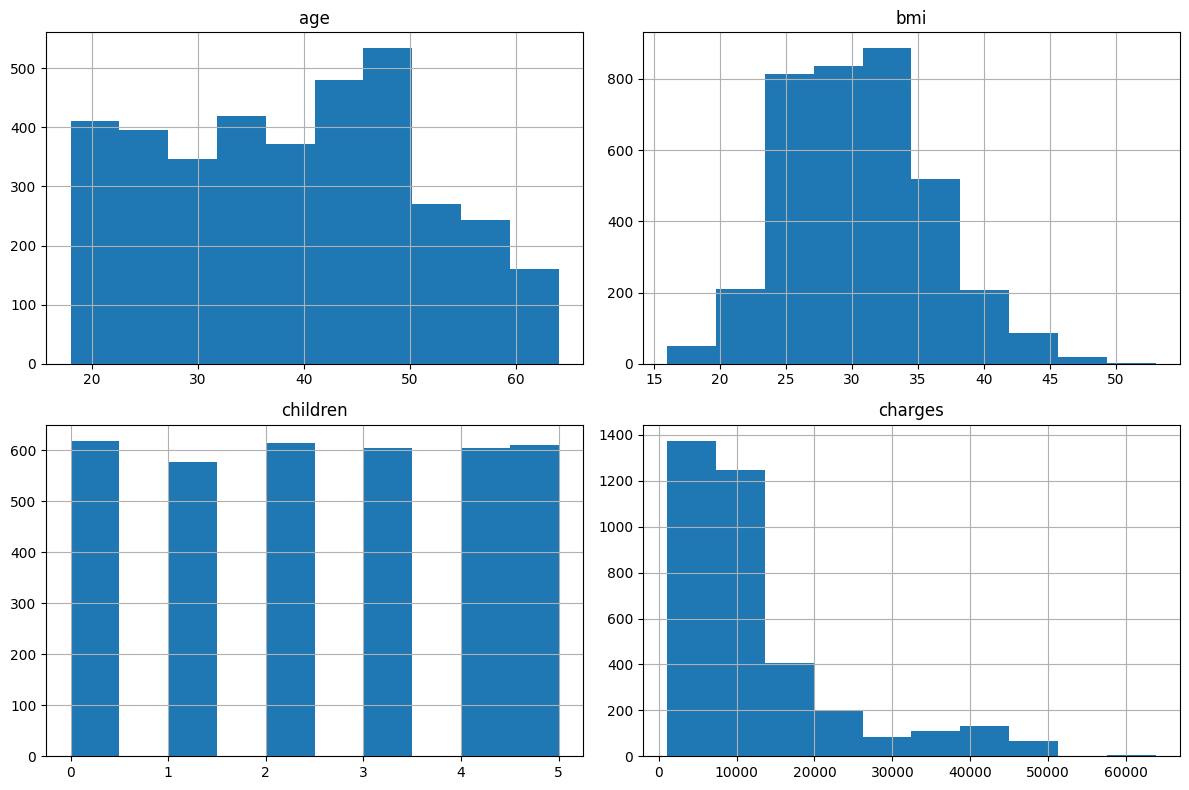

In [ ]:
# @title Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

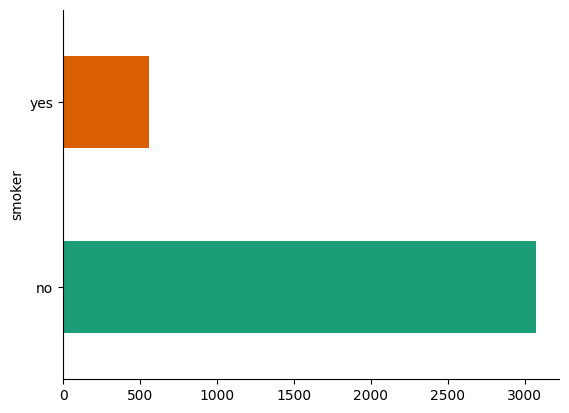

In [ ]:
# @title Smoker

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

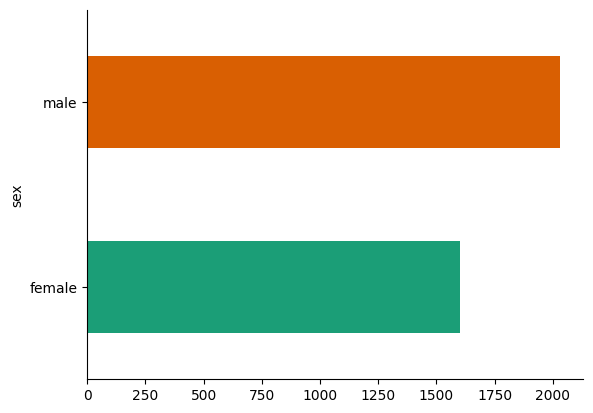

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

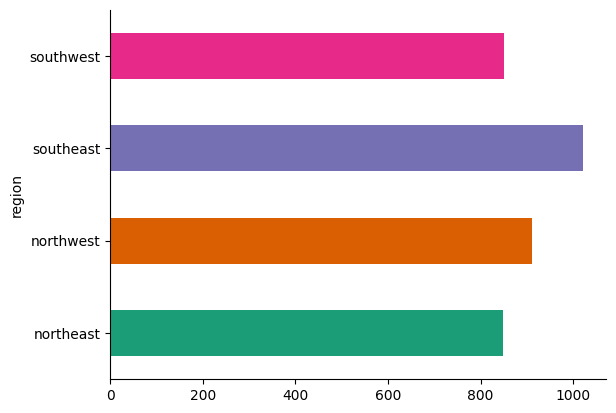

In [ ]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

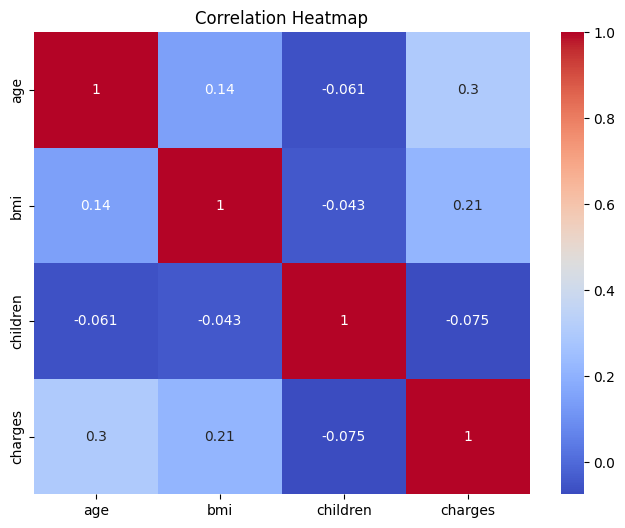

In [ ]:
# @title Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


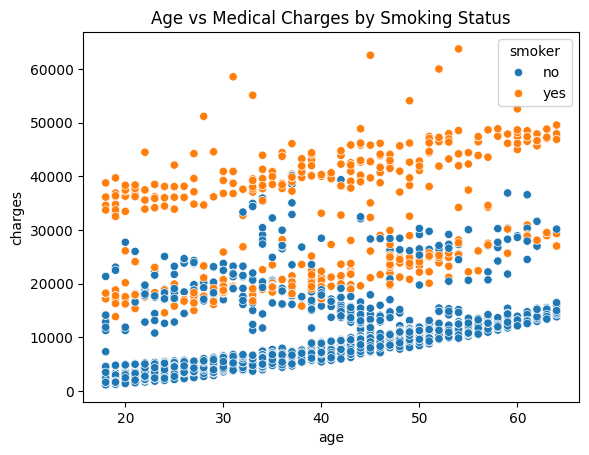

In [ ]:
# @title Age vs Medical Charges by Smoking Status
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Medical Charges by Smoking Status")
plt.show()


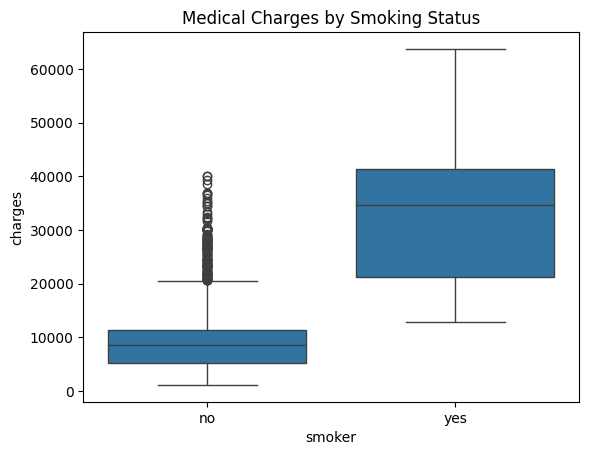

In [ ]:
# @title Medical Charges by Smoking Status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status")
plt.show()

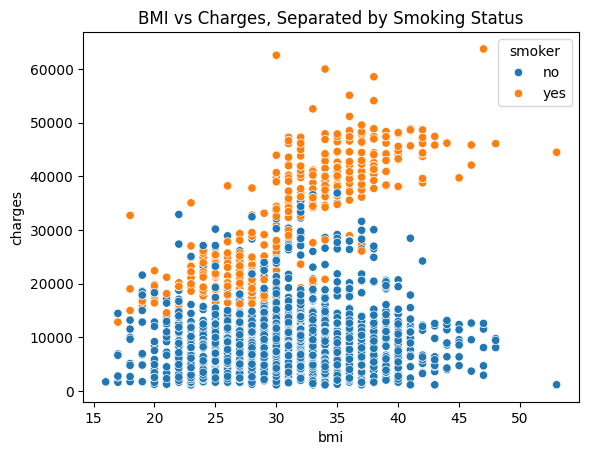

In [ ]:
# @title BMI vs Charges, Separated by Smoking Status
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges, Separated by Smoking Status")
plt.show()

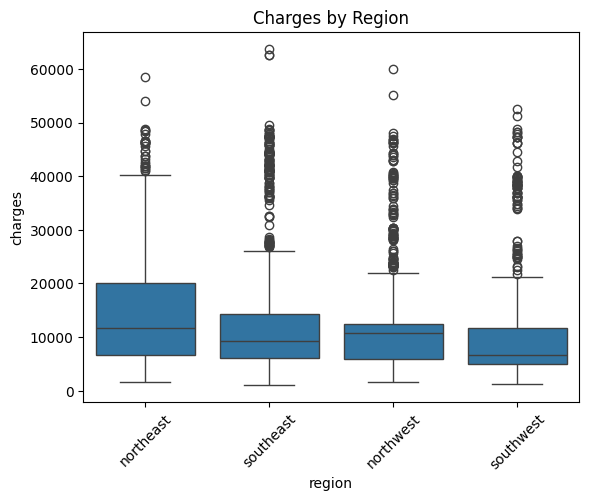

In [ ]:
# @title Charges by Region
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.xticks(rotation=45)
plt.show()

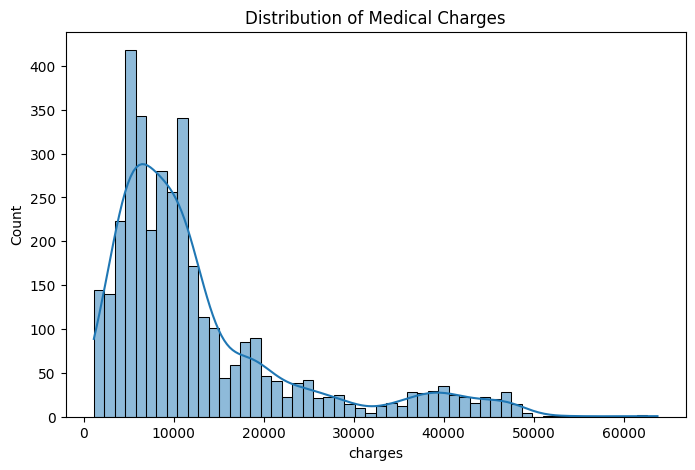

In [ ]:
# @title Distribution of Medical Charges
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()


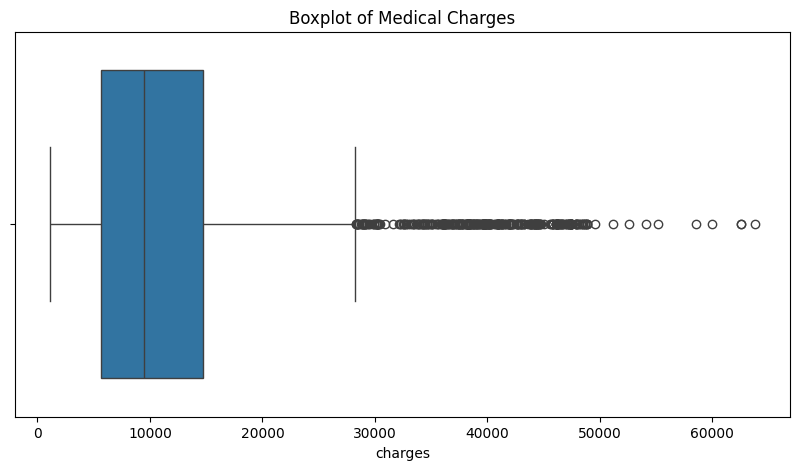

In [ ]:
# @title Boxplot of Medical Charges
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['charges'])
plt.title("Boxplot of Medical Charges")
plt.show()


In [ ]:
# Using log transfor to make the distribution more normal
import numpy as np

df['charges_log'] = np.log1p(df['charges'])  # log1p = log(1 + x) to avoid log(0)
df

,age,sex,bmi,smoker,region,children,charges,charges_log
0,21,male,26,no,northeast,2,3280,8.095904
1,37,female,26,yes,southeast,3,21454,9.973713
2,18,male,30,no,southeast,1,1720,7.450661
3,37,male,31,no,northeast,3,6801,8.824972
4,58,male,32,no,southeast,1,11947,9.388319
...,...,...,...,...,...,...,...,...
3625,49,female,41,no,northwest,4,10987,9.304559
3626,39,female,26,no,southeast,2,11736,9.370502
3627,56,male,40,no,southwest,0,10602,9.268892
3628,48,female,35,no,southeast,1,8976,9.102421


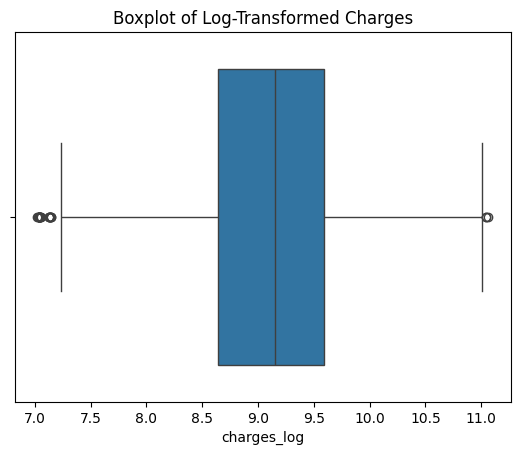

In [ ]:
# @title Boxplot of Log-Transformed Charges
sns.boxplot(x=df['charges_log'])
plt.title("Boxplot of Log-Transformed Charges")
plt.show()


In [ ]:
# Categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical variables:")
print(categorical_cols)

# Numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64','int32','float32']).columns.tolist()

print("numeric variables:")
print(numeric_cols)

Categorical variables:
['sex', 'smoker', 'region']
numeric variables:
['age', 'bmi', 'children', 'charges', 'charges_log']


In [ ]:
from scipy.stats import zscore

def remove_outliers(df, columns=None, method='iqr', threshold=3, contamination=0.05):

    df_clean = df.copy()

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Method 1: Z-score (for normal distributions)
    if method == 'zscore':
        z_scores = df[columns].apply(zscore)
        df_clean = df[(np.abs(z_scores) < threshold).all(axis=1)]

    # Method 2: IQR (for skewed data)
    elif method == 'iqr':
        mask = pd.Series(True, index=df.index)
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            mask &= (df[col] >= Q1 - threshold*IQR) & (df[col] <= Q3 + threshold*IQR)
        df_clean = df[mask]

    print(f"Removed {len(df) - len(df_clean)} outliers ({method} method)")
    return df_clean
df_clean = remove_outliers(df, columns=numeric_cols, method='iqr', threshold=1.5)

df_clean.sample(5)

Removed 411 outliers (iqr method)


,age,sex,bmi,smoker,region,children,charges,charges_log
3174,51,female,41,no,northeast,0,9876,9.197964
2663,45,female,26,no,southeast,5,9979,9.208338
2956,33,female,19,yes,northeast,2,16776,9.727764
3541,46,male,41,no,southeast,3,8936,9.097955
788,40,female,33,no,northeast,3,7612,8.937613


In [ ]:
print(f"Original: {df.shape[0]} rows")
print(f"After removing outliers: {df_clean.shape[0]} rows")

Original: 3630 rows
After removing outliers: 3219 rows


In [ ]:
# Use transformed charges if needed
target = 'charges'  # or 'charges' if you're using raw values

X = df.drop(['charges', 'charges_log'], axis=1)
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor  # ✅ Add XGBoost

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Define models and hyperparameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            # No hyperparameters to tune
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0, 50.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'model__alpha': [0.001, 0.01, 0.1, 1.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# Run GridSearchCV for all models
best_models = {}

for name, config in models.items():
    print(f"🔍 Tuning {name}...")

    pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_models[name] = grid

    print(f"✅ Best score (MSE): {-grid.best_score_:.2f}")
    print(f"🔧 Best params: {grid.best_params_}\n")


🔍 Tuning LinearRegression...
✅ Best score (MSE): 32791931.27
🔧 Best params: {}

🔍 Tuning Ridge...
✅ Best score (MSE): 32791907.30
🔧 Best params: {'model__alpha': 0.1}

🔍 Tuning Lasso...
✅ Best score (MSE): 32791931.50
🔧 Best params: {'model__alpha': 0.001}

🔍 Tuning RandomForest...
✅ Best score (MSE): 13111326.64
🔧 Best params: {'model__max_depth': 10, 'model__n_estimators': 100}

🔍 Tuning GradientBoosting...
✅ Best score (MSE): 13396402.50
🔧 Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}

🔍 Tuning XGBoost...
✅ Best score (MSE): 13372862.60
🔧 Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
for name, model in best_models.items():
    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"📈 {name} Performance on Test Set")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")


📈 LinearRegression Performance on Test Set
  RMSE: 5676.33
  R² Score: 0.7203

📈 Ridge Performance on Test Set
  RMSE: 5676.49
  R² Score: 0.7203

📈 Lasso Performance on Test Set
  RMSE: 5676.33
  R² Score: 0.7203

📈 RandomForest Performance on Test Set
  RMSE: 3502.88
  R² Score: 0.8935

📈 GradientBoosting Performance on Test Set
  RMSE: 3783.90
  R² Score: 0.8757

📈 XGBoost Performance on Test Set
  RMSE: 3734.54
  R² Score: 0.8789



In [ ]:
path='/content/drive/MyDrive/Dataset/Test_Data.csv'
test_df=pd.read_csv(path)
test_df


,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4
...,...,...,...,...,...,...
487,51.000000,male,27.740000,no,northeast,1
488,33.000000,male,42.400000,no,southwest,5
489,47.769999,male,29.064615,no,northeast,4
490,41.530738,female,24.260852,no,southeast,5


In [ ]:
# Preview
print(test_df.columns)

# Optional: Check for missing data
print(test_df.isnull().sum())


Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children'], dtype='object')
age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64


In [ ]:
# Use the best Random Forest model from earlier
rf_model = best_models['RandomForest'].best_estimator_

# Predict charges
test_predictions = rf_model.predict(test_df)
test_predictions

array([ 7427.61261176,  9483.39004277, 12445.91513909,  6805.42614991,
       41176.16116453, 10256.3122016 , 11148.20279708,  6698.52203385,
        3074.33851905, 14098.32459581,  2795.244209  ,  6179.26980452,
        8199.44955014,  5247.61040009,  7374.04578688,  7894.27561833,
       10707.55869872, 14766.28070349, 15237.96374401, 11077.74742196,
       11127.44719559, 12719.78064014, 36876.44122054, 11319.10871271,
       10975.29432926, 11205.83967193, 22504.46051118, 12543.93964283,
        8508.41554582, 11121.44738507,  4010.04984642,  5295.00248853,
        4765.88456382, 11048.01809676,  4935.51370349,  6876.59360615,
       36084.21905491,  5047.14016546,  8985.6354183 ,  4895.54153906,
       23794.58452573,  6490.25271567, 10299.55125323,  9908.91386632,
        6727.32911363,  7674.89350473, 11714.36812434,  5050.76027974,
       10611.29352049, 40600.78172714,  9163.0204244 ,  4579.268742  ,
       14204.91889583, 19476.00428225, 14486.82589755,  9400.80208032,
      

In [ ]:
test_df['charges'] = test_predictions
test_df

,age,sex,bmi,smoker,region,children,charges
0,40.000000,male,29.900000,no,southwest,2,7427.612612
1,47.000000,male,32.300000,no,southwest,1,9483.390043
2,54.000000,female,28.880000,no,northeast,2,12445.915139
3,37.000000,male,30.568094,no,northeast,3,6805.426150
4,59.130049,male,33.132854,yes,northeast,4,41176.161165
...,...,...,...,...,...,...,...
487,51.000000,male,27.740000,no,northeast,1,10548.084935
488,33.000000,male,42.400000,no,southwest,5,6644.149680
489,47.769999,male,29.064615,no,northeast,4,12369.031064
490,41.530738,female,24.260852,no,southeast,5,9738.343584


In [ ]:
import pickle

best_model = best_models['RandomForest'].best_estimator_

# Save to a .pkl file
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)

print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl
